In [2]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np


In [39]:


def get_df_report(path):
    data = pd.read_csv(path, parse_dates=["timestamp"])

    data["name"] = data["app_name"].map(lambda x: x.split(" — ")[-1].split(" - ")[-1])
    data.columns = ["timestamp", "window_title", "minutes_away", "app_name"]
    data = data.sort_values(["app_name", "timestamp"])

    total_usage = data.copy()
    total_usage["daily_usage"] = total_usage.apply(sum_times, axis=1)
    # total_usage.head(5)

    total_usage = (
        total_usage.groupby("app_name")["daily_usage"]
        .max()
        .sort_values(ascending=False)
    )
    total_usage = total_usage.to_frame()
    total_usage = total_usage.reset_index()
    total_usage['daily_usage'] = (total_usage['daily_usage'] / np.timedelta64(1, 'h'))
    return total_usage


last_timestamp = timedelta(seconds=0)
last_app_name = "x"
total_delta = timedelta(seconds=0)


def sum_times(row):
    global last_timestamp, last_app_name, total_delta
    if (str(last_timestamp) == "0:00:00") or (row["app_name"] != last_app_name):
        last_timestamp = row["timestamp"]
        last_app_name = row["app_name"]
        total_delta = timedelta(seconds=0)
        return timedelta(seconds=0)

    elif (row["timestamp"] - last_timestamp) < timedelta(seconds=40):
        delta = row["timestamp"] - last_timestamp
        total_delta += delta
        return total_delta

    else:
        last_timestamp = row["timestamp"]
        return total_delta


             app_name      daily_usage  daily_usage_seconds
0     Mozilla Firefox  03:55:05.001600                14105
1  Visual Studio Code  02:57:06.998400                10626
2                  tk  00:10:26.000400                  626
3            Untitled  00:03:30.999600                  210
4        Python Dados  00:03:01.000800                  181


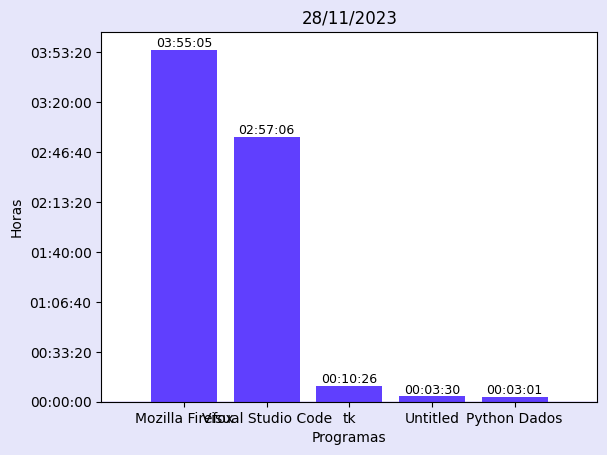

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker
import matplotlib.cbook as cbook

image_path = cbook.get_sample_data('E:\DEV\Python\PyWindows\pictures\\bg_graph.jpg')
img = plt.imread(image_path)

class Constants:
    BG_COLOR = "#E6E6FA"
    BUTTON_ACTIVE_COLOR = "#603FFE"

# Seu DataFrame de exemplo
data = {'app_name': ['Mozilla Firefox', 'Visual Studio Code', 'tk', 'Untitled', 'Python Dados'],
        'daily_usage': [3.918056, 2.951944, 0.173889, 0.058611, 0.050278]}

df = pd.DataFrame(data)

# Converter os valores para o formato de hora (assumindo que os valores estão em horas)
df['daily_usage'] = pd.to_datetime(df['daily_usage'], unit='h').apply(lambda x: x.time())

fig, ax = plt.subplots()
ax.set_title('28/11/2023')
ax.set_ylabel('Horas')
ax.set_xlabel('Programas')
fig.set_facecolor(Constants.BG_COLOR)
ax.imshow(img, extent=[-1, 5, 0, 6], aspect='auto', alpha=0.2)

# Converter datetime.time para o total de segundos do dia
df['daily_usage_seconds'] = df['daily_usage'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)
print(df)

bars = ax.bar(df['app_name'].head(5), df['daily_usage_seconds'].head(5), color=Constants.BUTTON_ACTIVE_COLOR)

# Adiciona os valores detalhados em cima de cada barra
for bar in bars:
    yval = bar.get_height()
    hours, remainder = divmod(yval, 3600)
    minutes, seconds = divmod(remainder, 60)
    formatted_time = "{:02}:{:02}:{:02}".format(int(hours), int(minutes), int(seconds))
    ax.text(bar.get_x() + bar.get_width() / 2, yval, formatted_time, ha='center', va='bottom', color='black', fontsize=9)

# Configurar o eixo y para mostrar os valores em horas
def format_hours(x, pos):
    hours = int(x // 3600)
    minutes = int((x % 3600) // 60)
    seconds = int(x % 60)
    return f"{hours:02d}:{minutes:02d}:{seconds:02d}"

ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_hours))


plt.show()


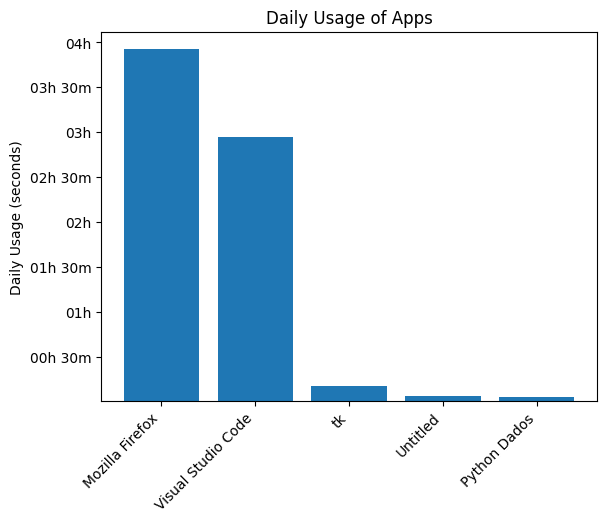

In [68]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd

# Seu DataFrame
data = {'app_name': ['Mozilla Firefox', 'Visual Studio Code', 'tk', 'Untitled', 'Python Dados'],
        'daily_usage': ['03:55:05.001600', '02:57:06.998400', '00:10:26.000400', '00:03:30.999600', '00:03:01.000800'],
        'daily_usage_seconds': [14123, 10626, 626, 210, 181]}

df = pd.DataFrame(data)

# Função para calcular os valores desejados para os ticks do eixo y
def calculate_yticks(max_value):
    if max_value> 15000:
        interval = 3600  # Intervalo de 1 hora
    else:
        interval = 1800  # Intervalo de 30 minutos
    max_value_hours = max_value / 3600
    max_value_rounded = (int(max_value_hours) + 1) * 3600
    return [i * interval for i in range(max_value_rounded // interval, 0, -1)]

# Criar o gráfico
fig, ax = plt.subplots()

# Plotar os dados
ax.bar(df['app_name'], df['daily_usage_seconds'])

# Configurar o eixo y para mostrar os valores em horas
def format_hours(x, pos):
    hours = int(x // 3600)
    minutes = int((x % 3600) // 60)

    if minutes == 0:
        return f"{hours:02d}h"
    else:
        return f"{hours:02d}h {minutes:02d}m"

ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_hours))

# Calcular os valores desejados para os ticks do eixo y com base no valor máximo
max_value = df['daily_usage_seconds'].max()
desired_ticks = calculate_yticks(max_value)

# Configurar o intervalo da legenda no eixo y
ax.set_yticks(desired_ticks)

# Rotacionar os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45, ha="right")

# Adicionar rótulos e título
plt.ylabel('Daily Usage (seconds)')
plt.title('Daily Usage of Apps')

# Exibir o gráfico
plt.show()


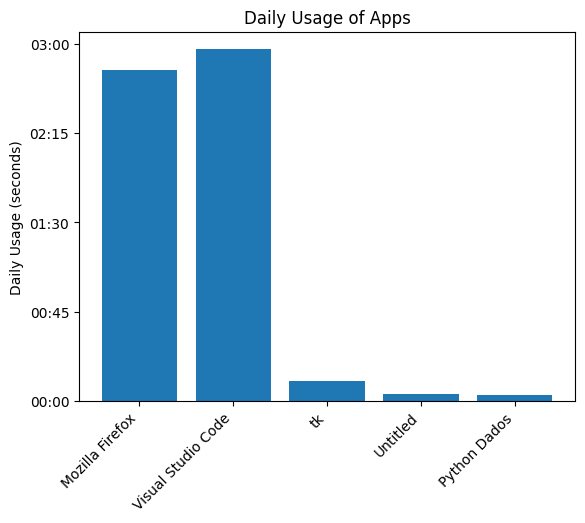

In [78]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import numpy as np

# Seu DataFrame
data = {'app_name': ['Mozilla Firefox', 'Visual Studio Code', 'tk', 'Untitled', 'Python Dados'],
        'daily_usage': ['03:55:05.001600', '02:57:06.998400', '00:10:26.000400', '00:03:30.999600', '00:03:01.000800'],
        'daily_usage_seconds': [10000, 10626, 626, 210, 181]}

df = pd.DataFrame(data)

# Criar o gráfico
fig, ax = plt.subplots()

# Plotar os dados
ax.bar(df['app_name'], df['daily_usage_seconds'])

# Configurar o eixo y para mostrar os valores em horas
def format_hours(x, pos):
    hours = int(x // 3600)
    minutes = int((x % 3600) // 60)
    return f"{hours:02d}:{minutes:02d}"

ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_hours))

# Calcular o valor máximo arredondado para o quarto de hora superior
max_value = df['daily_usage_seconds'].max()
rounded_max_value = np.ceil(max_value / 900) * 900

# Ajustar o número de ticks com base no valor máximo arredondado
num_ticks = 5  # Você pode ajustar esse valor conforme necessário
tick_interval = rounded_max_value / (num_ticks - 1)

desired_ticks = [i * tick_interval for i in range(num_ticks)]

# Configurar o intervalo da legenda no eixo y
ax.set_yticks(desired_ticks)

# Rotacionar os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45, ha="right")

# Adicionar rótulos e título
plt.ylabel('Daily Usage (seconds)')
plt.title('Daily Usage of Apps')

# Exibir o gráfico
plt.show()


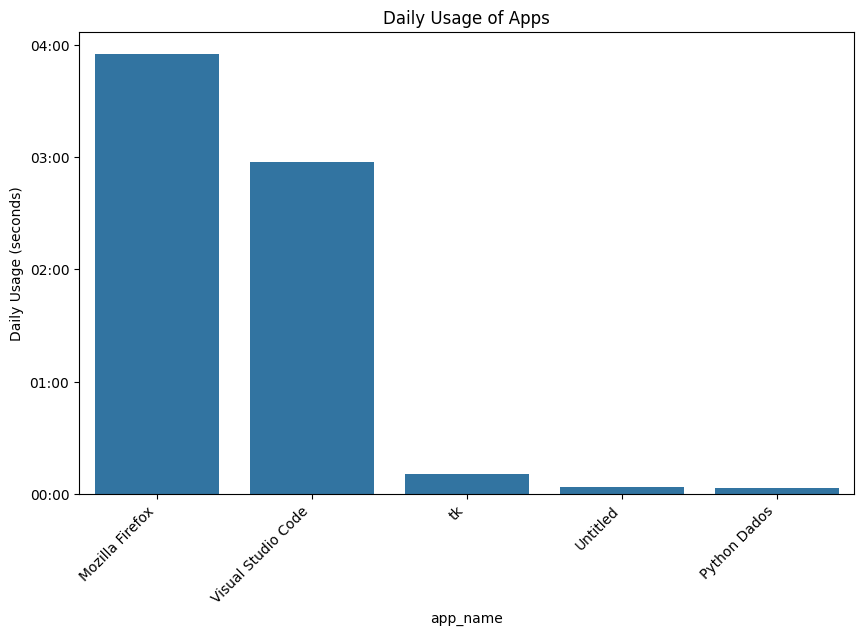

In [79]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Seu DataFrame
data = {'app_name': ['Mozilla Firefox', 'Visual Studio Code', 'tk', 'Untitled', 'Python Dados'],
        'daily_usage': ['03:55:05.001600', '02:57:06.998400', '00:10:26.000400', '00:03:30.999600', '00:03:01.000800'],
        'daily_usage_seconds': [14105, 10626, 626, 210, 181]}

df = pd.DataFrame(data)

# Criar o gráfico usando Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='app_name', y='daily_usage_seconds', data=df)

# Configurar o eixo y para mostrar os valores em horas
def format_hours(x, pos):
    hours = int(x // 3600)
    minutes = int((x % 3600) // 60)
    return f"{hours:02d}:{minutes:02d}"

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_hours))

# Calcular o valor máximo arredondado para o quarto de hora superior
max_value = df['daily_usage_seconds'].max()
rounded_max_value = np.ceil(max_value / 900) * 900

# Ajustar o número de ticks com base no valor máximo arredondado
num_ticks = 5  # Você pode ajustar esse valor conforme necessário
tick_interval = rounded_max_value / (num_ticks - 1)

desired_ticks = [i * tick_interval for i in range(num_ticks)]

# Configurar o intervalo da legenda no eixo y
plt.yticks(desired_ticks)

# Rotacionar os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45, ha="right")

# Adicionar rótulos e título
plt.ylabel('Daily Usage (seconds)')
plt.title('Daily Usage of Apps')

# Exibir o gráfico
plt.show()
